In [2]:
!pip install Pillow

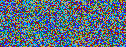

In [3]:
import numpy as np
from PIL import Image

input = Image.open('Input1.png')
input

In [4]:
#print dimensions of image
print(input.size)

(126, 47)


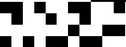

In [5]:
output = Image.open('Output1.png')
output

In [6]:
#print dimensions of image
print(output.size)

(126, 47)


In [7]:
# convert image to numpy array
input = np.array(input)
output = np.array(output)

# check the shape of the array
print(input.shape)
print(output.shape)

(47, 126, 3)
(47, 126, 3)


In [8]:
input 

array([[[168,   2,  16],
        [  2, 173, 240],
        [ 41,  23, 255],
        ...,
        [  6, 112,  61],
        [168,   2,  16],
        [  2, 173, 240]],

       [[  2, 173, 240],
        [  2, 173, 240],
        [  2, 173, 240],
        ...,
        [161, 175, 181],
        [168, 168,   2],
        [168, 168,   2]],

       [[  2, 173, 240],
        [168, 168,   2],
        [  6, 112,  61],
        ...,
        [ 41,  23, 255],
        [ 41,  23, 255],
        [168,   2,  16]],

       ...,

       [[ 41,  23, 255],
        [  6, 112,  61],
        [ 41,  23, 255],
        ...,
        [  6, 112,  61],
        [  2, 173, 240],
        [161, 175, 181]],

       [[168,   2,  16],
        [168, 168,   2],
        [ 41,  23, 255],
        ...,
        [  2, 173, 240],
        [161, 175, 181],
        [ 41,  23, 255]],

       [[168,   2,  16],
        [  6, 112,  61],
        [168,   2,  16],
        ...,
        [161, 175, 181],
        [  2, 173, 240],
        [ 41,  23, 255]]

In [9]:
output

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[215, 215, 215],
        [215, 215, 215],
        [215, 215, 215],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 33,  33,  33]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [222, 222, 222]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [251, 251, 251]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [11]:
import tqdm

#open the input image
newInput = Image.open('Input1.png')

#convert the image to numpy array
newInput = np.array(newInput)

def match_matrix(input_matrix, input_image, output_image):
    for i in range(input_image.shape[0]-2):
        for j in range(input_image.shape[1]-2):
            if np.array_equal(input_matrix, input_image[i:i+3, j:j+3]):
                return output_image[i:i+3, j:j+3]
    return None 

for i in tqdm.tqdm(range(newInput.shape[0]-2)):
    for j in range(newInput.shape[1]-2):
        matrix = newInput[i:i+3, j:j+3]
        result = match_matrix(matrix, input, output)
        if result is not None:
            newInput[i:i+3, j:j+3] = result

newInput = Image.fromarray(newInput)
newInput

#save the output
newInput.save('OutputNew.png')

 

  9%|▉         | 4/45 [00:08<01:29,  2.18s/it]